In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def generate_dataset(no_of_clusters, no_of_points_per_cluster):


    random_data = np.random.randn(no_of_points_per_cluster, 2)

    mu_new, sigma_new, fi = generate_random_shifts()

    transformed_data = shift_data(random_data, mu_new, sigma_new, fi)

    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    data_matrix = transformed_data
    for i in range(no_of_clusters - 1):

      random_data = np.random.randn(no_of_points_per_cluster, 2)
      mu_new, sigma_new, fi = generate_random_shifts()

      transformed_data = shift_data(random_data, mu_new, sigma_new, fi)

      plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

      data_matrix = np.concatenate((data_matrix, transformed_data), axis=0)

    plt.show()

    return data_matrix

In [ ]:
def generate_random_shifts():

    mu_new = np.array([random.randint(-10, 10), random.randint(-10, 10)])
    sigma_new = np.array([[random.randrange(1, 4), 0], [0, random.randrange(1, 4)]])
    fi = math.pi/(random.randint(1, 4))

    return mu_new, sigma_new, fi


In [ ]:
def shift_data(data, mu, sigma, fi):

  cos_fi = math.cos(fi)
  sin_fi = math.sin(fi)
  rotate_matrix = np.array([[cos_fi, -sin_fi], [sin_fi, cos_fi]])

  Data_new = (data).dot(sigma)
  Data_new_rotated = Data_new.dot(rotate_matrix.T)
  shifted_data = Data_new.dot(rotate_matrix.T) + mu
  
  return shifted_data

In [ ]:
def main():
    data_matrix = generate_dataset(4, 1000)

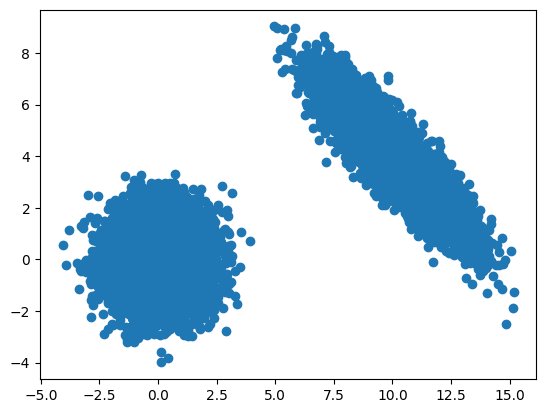

In [ ]:
main()